In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import sys 
import numpy.ma as ma
import scipy.stats as st
import scipy.signal as si
from astropy.io import fits
from astropy.table import Table
import scipy.ndimage.morphology as morph
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline
from scipy import ndimage as ndi
sys.path.insert(0,'../lib')

import detection_tools as dt
import detection_preprocessing as dp
import strategy_detection_pose as sdp
import mle_sparse_est as mse
import matplotlib 
import strategy_detection_pose as sd
import parameters
%load_ext autoreload

%autoreload 2

In [2]:
# Version information
version = 1.4
# source dir
#nom_dossier='../results/sources_udf10/'

nom_dossier='../data/udf10_lya_sources_v0/'

In [3]:
sys.path.insert(0,'../MPDAF')
import mpdaf

from mpdaf.obj import WCS
from mpdaf.obj import WaveCoord
from mpdaf.obj import Image
from mpdaf.obj import Spectrum
from mpdaf.obj import Cube
#from mpdaf.obj import CubeDisk

from mpdaf.sdetect import Source, SourceList
from mpdaf.sdetect import Catalog

In [4]:
def calcul_fwhm(lam):
    """
    Full-Width at Half Maximum computation for the HDFS datacube.
    See Bacon et al., 2015, *The MUSE 3D View of the Hubble Deep Field South*.
    
    :param float lam: wavelength to perform the computation.
    
    """
    return -1.625*10**(-4) *lam + 4.5375

In [5]:

#cube = Cube('../data/udf10/DATACUBE-PROPVAR-ZAP_UDF-10.fits')
#cube = Cube('../data/DATACUBE_UDF-10.fits')
#cube.info()

In [6]:
cat = Catalog.read('../data/udf10_c031_e026_withz.vot')

cat_lya=cat[cat['TYPE']==6]

#im = cube.mean(axis=0)

#fig = plt.figure(figsize=(20,20))
#ax = plt.subplot(1,1,1)

#im.plot(vmin=0,vmax=5,cmap='magma_r')
#cat.plot_id(ax,im.wcs)
#cat_lya.plot_id(ax,im.wcs,col='blue')

/home/miv/courbot/anaconda/lib/python2.7/site-packages/astropy/table/column.py:1095: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  ma.MaskedArray.__setitem__(self, index, value)


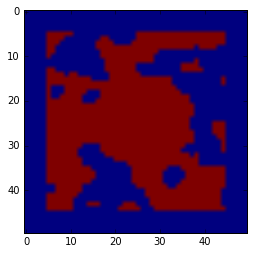

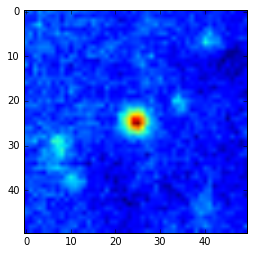

In [54]:
####
# Essai Heolth sur une source UDF10 pour le talk DSIM
###

#src= Source.from_file('../data/udf10_63test.fits')
num=149
src= Source.from_file('../../Bayes/Champs/data/udf10_lya_sources_v0/udf10_'+str(num)+'.fits')

cube = src.cubes['CUBE_MS']
Y_ms = np.swapaxes(cube.data.data,2,0)

lambda_0 = 4750    # see Bacon et al, 2015
lambda_lya = 1216
pas_spectral = 1.25 # Angstrom / spectral band

W = 20
W_aff = 300
S = 50

pfa_faint=0.75
pfa_bright=0.5
diag = 1
P = 1
taille_f = 11
beta=2.6
PFA = np.array([0.1,0.01,0.001, 0.0001])

wave = src.cubes['CUBE_MS'].wave
lam = (wave.get_start()+wave.get_end())/2.
fwhm_courant = calcul_fwhm(lam)

S = Y_ms.shape[0] # assuming square...
centre = np.array([int(S/2),int(S/2)])
if src.id==157:
    centre=np.array([40,30])
elif src.id==208:
    centre=np.array([30,40])
#res, val, ests, X_init, val_init = sd.detection_strategy(Y_ms, P, diag, pfa_bright, pfa_faint, fwhm_courant, taille_f, beta,centre)


params = parameters.Params(Y_ms,
                       centre,
                       pfa_bright=pfa_bright,
                       pfa_faint=pfa_faint,
                       FWHM=fwhm_courant)


params.confident=True

#try:
Xe1,ve1,vem1,Xi,vi = sdp.detection_strategy(params) 

#np.savez('../results/obj157_talk.npz', Xe1=Xe1,ve1=ve1,vem1=vem1,Xi=Xi,vi=vi)
plt.imshow(Xe1)
plt.show()

plt.imshow(Y_ms.mean(axis=2))
plt.show()

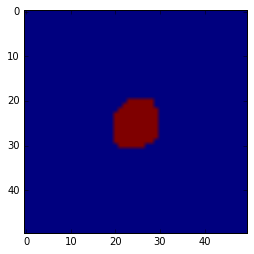

In [13]:
# Affichage essai heolth



In [8]:

#src_list = SourceList.from_path('../data/udf10/sources')
liste_id = (78,149,153,157,183,208,214,237,547,619,802,828,6295)

sourcelist = list()
for id in liste_id:

    src= Source.from_file('../data/udf10_lya_sources_v0/udf10_'+str(id)+'.fits')
    sourcelist.append(src)


In [9]:
lambda_0 = 4750    # see Bacon et al, 2015
lambda_lya = 1216
pas_spectral = 1.25 # Angstrom / spectral band

W = 20
W_aff = 300
S = 50

../lib/detection_preprocessing.py:84: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  liste_vec = np.zeros(shape=((S_new)*(S_new),taille_f*W))
../lib/detection_preprocessing.py:98: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  liste_vec[:,(pos)::(taille_f)] = np.reshape(cube[marge+decal_x:S-marge+decal_x,marge+decal_y:S-marge+decal_y,:], (S_new*S_new, W))#liste_vec_tout[pos,:,:]
/home/miv/courbot/anaconda/lib/python2.7/site-packages/numpy/core/fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
../lib/extended_detection_pose.py:65: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  X_b_tout[i,:] = D_3d_unip[:, Ind[s]] * Valmax[s]


Traitement source numero 78
Traitement source numero 149
Traitement source numero 153
Traitement source numero 157
Traitement source numero 183
Traitement source numero 208

/home/miv/courbot/anaconda/lib/python2.7/site-packages/astropy/stats/lombscargle/implementations/main.py:21: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .cython_impl import lombscargle_cython
/home/miv/courbot/anaconda/lib/python2.7/site-packages/astropy/stats/lombscargle/implementations/main.py:21: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  from .cython_impl import lombscargle_cython
/home/miv/courbot/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:812: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)



Traitement source numero 214
Traitement source numero 237
Traitement source numero 547
Traitement source numero 619
Traitement source numero 802
Traitement source numero 828
Traitement source numero 6295


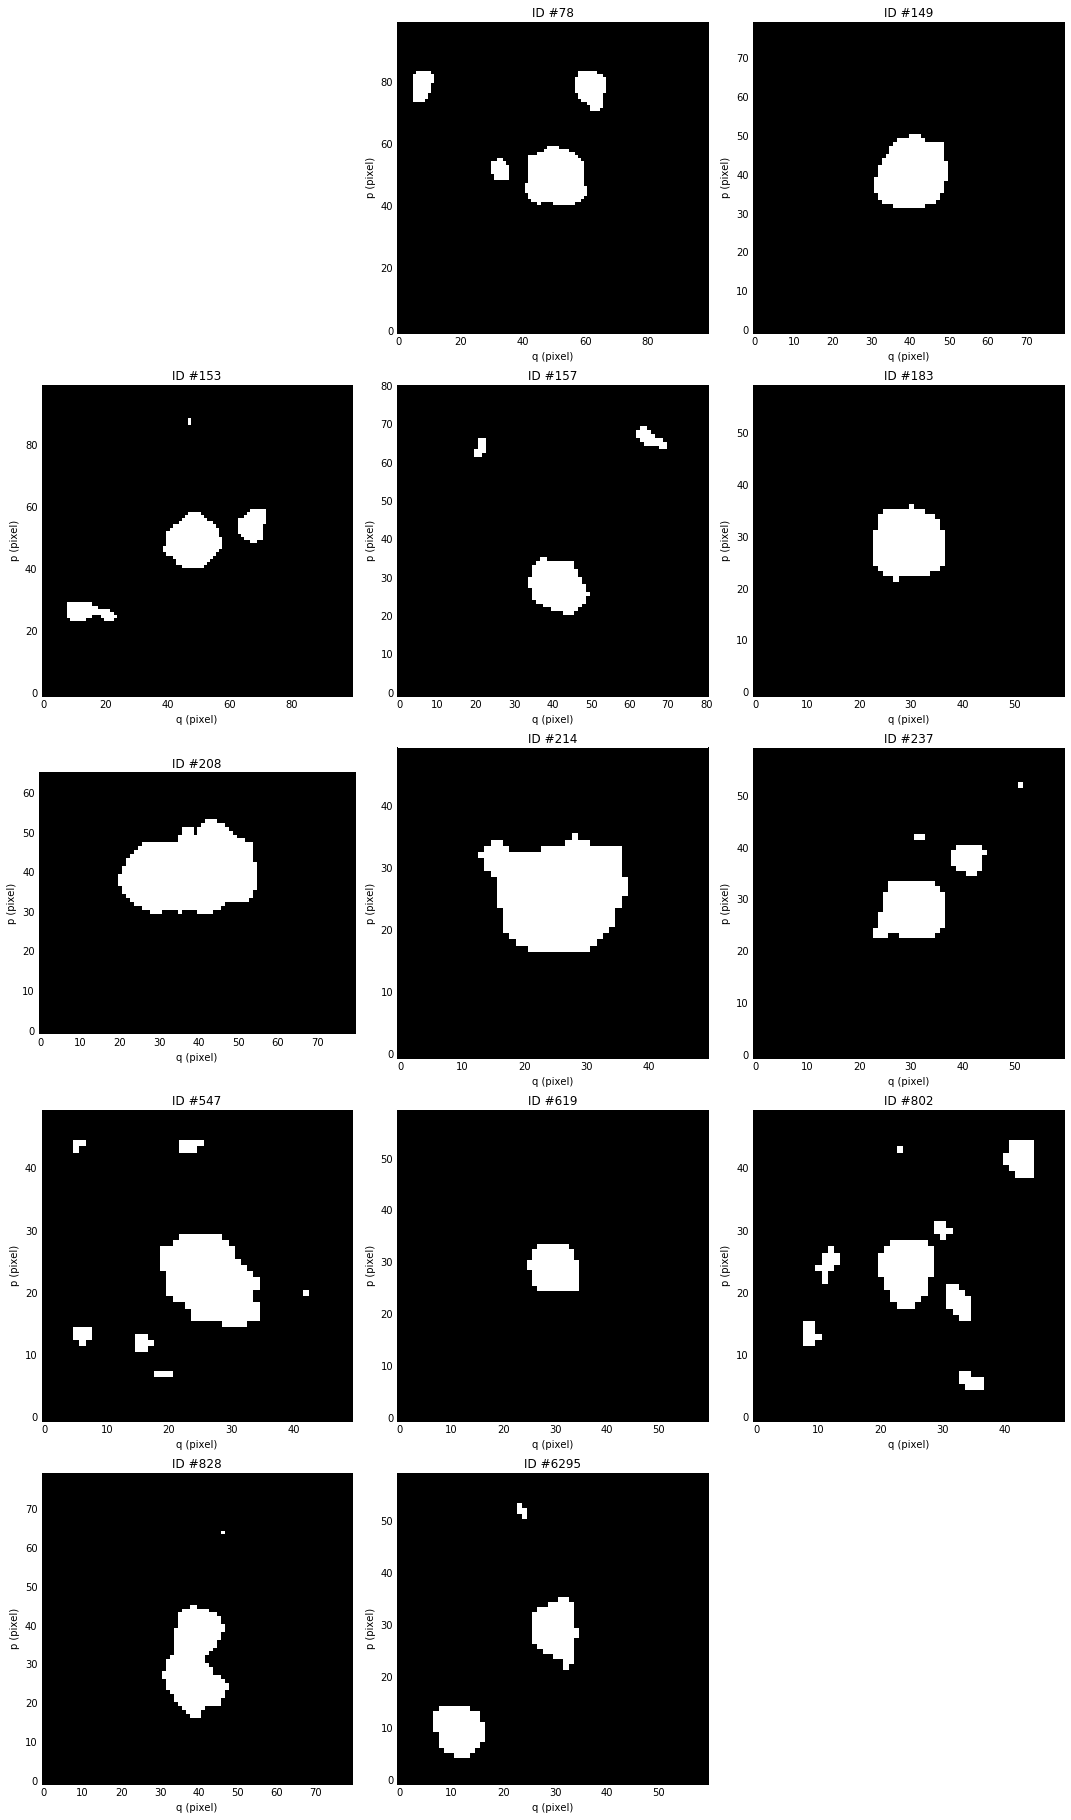

In [10]:
nb_li = 6
nb_col = 3
plt.figure(figsize=(nb_col*5,nb_li*5))

i=1
num_obj = 1
for src in sourcelist:#(sourcelist[5],):

    #if num_obj==4:
    #S =90
    print 'Traitement source numero '+str(src.id)    

    # Method parameters
    pfa_faint=0.001
    pfa_bright=0.01
    diag = 1
    P = 1
    taille_f = 11
    beta=2.6
    PFA = np.array([0.1,0.01,0.001, 0.0001])
    
    wave = src.cubes['CUBE_MS'].wave
    lam = (wave.get_start()+wave.get_end())/2.
    fwhm_courant = calcul_fwhm(lam)


    
    
    #Y_src = np.swapaxes(sub_cube_large.get_np_data(),2,0)

    cube = src.cubes['CUBE_MS']
    Y_ms = np.swapaxes(cube.data.data,2,0)
    

    if src.id==208:# seule source non carree
        taille = max( Y_ms.shape[0],Y_ms.shape[1])
        Y_ms_new = np.zeros((taille,taille,Y_ms.shape[2])) + np.nan
        Y_ms_new[:Y_ms.shape[0],:Y_ms.shape[1],:] = Y_ms
        Y_ms = Y_ms_new
    

    S = Y_ms.shape[0] # assuming square...
    centre = np.array([int(S/2),int(S/2)])
    if src.id==157:
        centre=np.array([40,30])
    elif src.id==208:
        centre=np.array([30,40])
    #res, val, ests, X_init, val_init = sd.detection_strategy(Y_ms, P, diag, pfa_bright, pfa_faint, fwhm_courant, taille_f, beta,centre)
    params = parameters.Params(Y_ms,
                           centre,
                           pfa_bright=pfa_bright,
                           pfa_faint=pfa_faint,
                           FWHM=fwhm_courant)


    params.confident=True

    #try:
    Xe1,ve1,vem1,Xi,vi = sdp.detection_strategy(params) 
    res,val, X_init = Xe1,ve1,Xi

    beta=2.6
    pas = 0.15
    nb_ech_dic = 50

    taille_f = 11
    marge = int(taille_f/2)

    F = dp.Moffat(taille_f, fwhm_courant,beta)
    D = dp.gen_dic(W, pas = pas, nb_ech=nb_ech_dic,asym=0)

    #-------- Moments calculation
    #im_ind_est,im_weight_est = mse.get_sparse_estimate(params)
    #flux,position,largeur = mse.get_moments(im_ind_est,im_weight_est,D,W,pas,pas_spectral)
    # recasting into original shape (to go inside the latter function)
    #flux_new = np.zeros((flux.shape[0]+2*marge, flux.shape[1]+2*marge))+np.nan; 
    #position_new = np.copy(flux_new)
    #largeur_new = np.copy(flux_new)

    #flux_new[marge:-marge,marge:-marge]=flux ; flux = flux_new
    #position_new[marge:-marge,marge:-marge]=position ; position = position_new
    #largeur_new[marge:-marge,marge:-marge]=largeur ; largeur = largeur_new

    #------- Spectra retrieving ----#

    Y_aff = Y_ms
    W_aff = Y_ms.shape[2]

    # Initial detection region
    reg_init = ma.masked_array(Y_aff, np.tile(np.invert(X_init)[:,:,np.newaxis], (1,1,W_aff)))
    sp_init = ma.mean(ma.mean(reg_init, axis=0), axis=0)

    # Outer detected region, connex to the center
    ma_ext = morph.binary_propagation(X_init, mask = res) - X_init
    reg_ext = ma.masked_array(Y_aff, np.tile(np.invert(ma_ext)[:,:,np.newaxis], (1,1,W_aff)))
    sp_ext = ma.mean(ma.mean(reg_ext, axis=0), axis=0)

    ma_tout = (res+X_init)>0
    # Outer detected regions, non-connex to the center
    ma_ext_pani = (res*(ma_ext==0)>0)
    reg_ext_pani = ma.masked_array(Y_aff, np.tile(np.invert(ma_ext_pani)[:,:,np.newaxis], (1,1,W_aff)))
    sp_ext_pani = ma.mean(ma.mean(reg_ext_pani, axis=0), axis=0)

    # Outside 
    reg_reste = ma.masked_array(Y_aff, np.tile(ma_ext[:,:,np.newaxis], (1,1,W_aff)))
    sp_reste = ma.mean(ma.mean(reg_reste, axis=0), axis=0)
    sp_reste_ex = Y_aff[-1,0,:] # exemple

    #------------ SNR calculation
    bruit_tab = np.reshape(reg_reste,(reg_reste.shape[0]**2,reg_reste.shape[2]))
    sigma_bruit = np.ma.cov(bruit_tab[~np.isnan(bruit_tab).all(1)],rowvar=0)

    if sp_ext.sum()!=0:
        rsb = 10.*np.log10((np.linalg.norm(sp_ext)**2)/np.trace(sigma_bruit))
    else:
        rsb = -1000


    #--------------------------------------#
    #-------Results retrievings------------#
    #----------(MPDAF Objects)-------------#
    # creation d'une image dumb contenant les coordonnes WCS, etc
    im1 = cube.sum(axis=0)
    res2 = res[:im1.data.shape[1],:im1.data.shape[0]]
    im1 = cube.sum(axis=0) ; im1.data = res2.T
    im2 = cube.sum(axis=0) ; im2.data = val[:im1.data.shape[1],:im1.data.shape[0]].T
    im_wh_ms = cube.mean(axis=0)
    im_wh = src.cubes['CUBE'].mean(axis=0)
    #im_msk = cube.sum(axis=0); im_msk.data=(parseg.weights).T

    dic_im = {'DET_BIN':im1 ,'DET_STAT':im2 , 'WHITE_MS' : im_wh_ms, 'WHITE' : im_wh}
    src.images=dic_im

    # recuperation du spectre estime via SEM:

    msk = res2.T ; cubemask = cube.copy(); cubemask.data.mask = msk==0
    sp_sum = cubemask.sum(axis=(1,2))#,weights=X_mpm_hmf.T)

    cubemask = src.cubes['CUBE'].copy(); cubemask.data.mask = msk==0
    sp_sum_noms = cubemask.sum(axis=(1,2))#src.cubes['CUBE'].sum(axis=(1,2),weights=X_mpm_hmf.T)
    #sp_sum = cube.sum(axis=(1,2),weights=res2.T)
    #sp_sum_noms = src.cubes['CUBE'].sum(axis=(1,2),weights=res2.T)
    #sp_init

    #sp_sem = Spectrum(data=parsem_hmf.mu.T*Ymax, wave=cube.wave)
    #sp_sem = cube.sum(axis=(1,2)) # initialisation pour avoir les bonens wavecoords
    #sp_sem.data =parsem_hmf.mu[0,:]*Ymax#p_sum.wave


    sp = {'sp_sum':sp_sum, 'sp_sum_noms':sp_sum_noms }
    src.spectra = sp


    src.write('../data/udf10_lya_sources_v0/udf10_'+str(src.id)+'.fits')




    ###### Some display (illustrative)
    ax = plt.subplot(nb_li,nb_col,num_obj+1)
    im1.plot(cmap=plt.cm.gray)

    plt.title('ID #'+str(src.id))

    #except:
    #    print 'erreur'
    #    pass
    
    num_obj+=1
    i+=1
    
plt.tight_layout()

In [11]:
im1 = cube.sum(axis=0) ; im1.data = res[:im1.data.shape[1],:im1.data.shape[0]] .T
im2 = cube.sum(axis=0) ; im2.data = val[:im1.data.shape[1],:im1.data.shape[0]].T

In [13]:
sourcelist = list()
numobj = 0
for id in liste_id:

    src= Source.from_file('../data/udf10_lya_sources_v0/udf10_'+str(id)+'.fits')
    sourcelist.append(src)
    numobj+=1

#################""
# catalogue pdf
doc_pdf = PdfPages('../data/udf10_lya_sources_v0/catalogue.pdf')

nb_li = 4
nb_col = 3
plt.figure(figsize=(nb_col*6,nb_li*6))
numobj = 0
for src in sourcelist:#(sourcelist[0],):    
    
    #try:

            fig = plt.figure(figsize=(nb_col*4,nb_li*4))
            cg = plt.cm.magma_r


            ############################################
            ###### Title
            ############################################

            props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
            texte = 'HEOLHT\nID #%d \n z = %.3f '%(src.id, src.z[0][0])
            plt.suptitle(texte, bbox=props,fontsize=14)


            ############################################
            ###### Plot White + Catalog
            ############################################
            ax=plt.subplot(nb_li,nb_col,1)
            im_wh = src.images['WHITE']
            cat2=cat.select(im_wh.wcs)
            cat_lya2=cat_lya.select(im_wh.wcs)
            ecart_z = np.abs(cat_lya2['Z_MUSE']-src.z[0][0])
            cat_lya2=cat_lya2[ecart_z < 0.05]

            
            im_wh.plot(cmap=cg,title='Subcube white image.\n Blue: LAE with $|z-z_{%.0f}|<0.05$.'%src.id)
            cat2.plot_id(ax,im_wh.wcs)
            cat_lya2.plot_id(ax,im_wh.wcs,col='blue')



            ############################################
            ###### Plot Mask + Catalog
            ############################################
            ax=plt.subplot(nb_li,nb_col,2)
            im_wh_ms = src.images['WHITE_MS']

            im_wh_ms.plot(title='After median substraction \n(used for processing)',cmap=cg, vmin=im_wh.data.data.min(),vmax = im_wh.data.data.max(),)
            cat2.plot_id(ax,im_wh_ms.wcs)
            cat_lya2.plot_id(ax,im_wh_ms.wcs,col='blue')

            ############################################
            ###### Plot segmentation (+ catalog?) + FSF if possible
            ############################################
            ax = plt.subplot(nb_li,nb_col,5)
            im_seg = src.images['DET_BIN']
            im_seg.data.mask = im_seg.data==0
            im_seg.plot( cmap=plt.cm.autumn,title='Detection map',vmin=-1,vmax=2.)
            
            cat_lya2.plot_id(ax,im_seg.wcs,col='blue')

            ############################################
            ###### Plot segmentation uncertainty
            ############################################
            plt.subplot(nb_li,nb_col,6)
            src.images['DET_STAT'].plot(cmap=plt.cm.gray,title='statistic map (log)',scale='log')#,vmin=0,vmax=1)

            ############################################
            ###### Plot estimated spectra
            ############################################
            #ax=plt.subplot(nb_li,nb_col,7)
            #try:
            #    sp_sem = src.spectra['SP_SEM']
            #except:
            #    sp_sem = src.spectra['sp_sem']
            #
            #sp_sem.plot()
            #plt.xlim(sp_sem.get_start(),sp_sem.get_end()) ; plt.grid()
            #plt.title('Prior estimation of $\\mu$')
            
            


            ############################################
            ###### Plot summed flux / spectrum
            ############################################
            ax=plt.subplot(nb_li,nb_col,8)
            try:
                sp_sum = src.spectra['SP_SUM']
            except:
                sp_sum = src.spectra['sp_sum']    
                
            sp_sum.plot()
            plt.xlim(sp_sum.get_start(),sp_sum.get_end()) ; plt.grid()
            plt.title('Summed flux (with med. sub.)')
            
            
            ############################################
            ###### Same on the real source (without med. sub.)
            ############################################
            ax=plt.subplot(nb_li,nb_col,9)
            try:
                sp_sum = src.spectra['SP_SUM_NOMS']
            except:
                sp_sum = src.spectra['sp_sum_noms']    
                
            sp_sum.plot()
            plt.xlim(sp_sum.get_start(),sp_sum.get_end()) ; plt.grid()
            plt.title('Summed flux (without med. sub.)')
            
            ############################################
            ###### Segmentation with separated objects
            ############################################            
            
            im2 = im_seg.copy()
            num_feat = ndi.label(im_seg.data.data,output=im2.data)
            im2.data.mask=(im2.data==0)
            c= 0
            for feat in range(1,num_feat+1):
                msk = (im2.data==feat)
                if msk.sum() > 20:
                    c +=1
            if c > 1:
                ax=plt.subplot(nb_li,nb_col,10)
                im2.plot(cmap=plt.cm.brg)
                plt.title('Object separation')

                ############################################
                ###### Plot object-wise summed flux / spectrum
                ############################################
                ax=plt.subplot(nb_li,nb_col,11)
                cmap= matplotlib.cm.get_cmap('brg')

                
                for feat in range(1,num_feat+1):
                    msk = (im2.data==feat)
                    if msk.sum() > 20:
                        cubemask = src.cubes['CUBE_MS'].copy()
                        cubemask.data.mask=msk==0
                        cubemask.sum(axis=(1,2)).plot(color=cmap((feat-1.)/float(num_feat-1)))
                plt.xlim(sp_sum.get_start(),sp_sum.get_end()) ; plt.grid()               
                plt.title('Summed flux (with med. sub)')
    


                ############################################
                ###### same w/out med sub
                ############################################
                ax=plt.subplot(nb_li,nb_col,12)
                cmap= matplotlib.cm.get_cmap('brg')

                for feat in range(1,num_feat+1):
                    msk = (im2.data==feat)
                    if msk.sum() > 20:
                        cubemask = src.cubes['CUBE'].copy()
                        cubemask.data.mask=msk==0
                        cubemask.sum(axis=(1,2)).plot(color=cmap((feat-1.)/float(num_feat-1)))
                plt.xlim(sp_sum.get_start(),sp_sum.get_end()) ; plt.grid()               
                plt.title('Summed flux (without med. sub)')

            ############################################
            ###### Print all quantitative info.
            ############################################
            ax=plt.subplot(nb_li,nb_col,4)
            surface= (src.images['DET_BIN'].data>0).sum()
            l1 = 'Input: $P_{FA} = %.4f$\n\n'
            #l2 = 'Estimation prior to segmentation:\n'
            #l3= '$\\sigma=%.4f$ \n$\\rho_1=%.4f$ \n$\\rho_2=%.4f$ \n\n'
            l4 = 'Detected surface: \n$S=%.0f$ pixels'
            ax.text(0.1,0.1,(l1+l4)%(0.001,surface),fontsize=12)
            
            plt.axis('off')                 
                

            ######### end the iteration over sources/pdf page
            
            plt.tight_layout()

            plt.subplots_adjust(top=0.85)
            doc_pdf.savefig(fig)
            plt.close(fig)
    #except:
    #    plt.close(fig)
    #    pass


doc_pdf.close()